<h3>通过python批量化提取功能连接相关矩阵</h3><br><font color = green size = 5>      Author:</font>LvQiuyu<br><font color = green size = 5>      Date:</font>20230107<br>


In [1]:
reset

Nothing done.


In [2]:
#导入所需要包
import sys
import os
from nilearn import datasets
import pandas as pd
import nilearn
from nilearn.maskers import NiftiMapsMasker

from nilearn.maskers import NiftiLabelsMasker
import nibabel as nib
from nilearn.connectome import ConnectivityMeasure
import numpy as np
import glob

<font color = "#00dddd" font size = 5>1 读取被试编号</font>

In [ ]:
os.chdir("G:/OpenNeuro/AOMIC_PIOP1/")

In [ ]:
# 定义要遍历的文件夹路径
folder_path = 'G:/OpenNeuro/AOMIC_PIOP1/'

# 获取该路径下所有子文件夹名字
sub_folders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]

# 将子文件夹名字写入到txt文件中
with open('F:/UCLA_ds000030/sub_folder_names.txt', 'w') as f:
    for sub_folder in sub_folders:
        f.write(sub_folder + '\n')

In [ ]:
'''
这里是被试的文件夹所的名称,使用ls>>Set1Suj.txt 定向到该txt文件.
该文本内容如下：cat Set1Subj.txt

sub_032301
sub_032302
sub_032303
sub_032304
sub_032305
sub_032306
sub_032307
sub_032308
sub_032309
sub_032310
sub_032311
sub_032312
sub_032313
sub_032314
sub_032315
sub_032316
将其读取到变量subjName
'''
with open('G:/OpenNeuro/AOMIC_PIOP1/AOMIC_PIOP1.txt') as f:
    subjName = f.read().splitlines()
    print(subjName)



<font color = "#00dddd" font size = 5>2 修改工作路径</font>

In [4]:
###该路径为所有被试文件夹所在的root路径
os.getcwd()
os.chdir("G:/OpenNeuro/AOMIC_PIOP1/derivatives/fmriprep/")


In [5]:
os.getcwd()

'G:\\OpenNeuro\\AOMIC_PIOP1\\derivatives\\fmriprep'

<font color = "#00dddd" font size = 5>3 读取图谱文件</font>

In [6]:
###使用nilearn的loadimage读取atlas所在的位置
Shen_ROI = nilearn.image.load_img("G:/GraPro/RawData/Atlas/Shen_ROI/atlas.nii.gz")



In [7]:
from nilearn.maskers import NiftiLabelsMasker
mask = NiftiLabelsMasker(labels_img = Shen_ROI,standardize= True)
import nibabel as nib
from nilearn.connectome import ConnectivityMeasure
import numpy as np

In [22]:
###读取mdsl图谱
atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas["maps"]
labels = atlas["labels"]

In [8]:
import matplotlib

<font color = "#00dddd" font size = 5>3.1 查看图谱</font>

d:\Anaconda\Conda\envs\Nilearn\lib\site-packages\nilearn\plotting\img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()


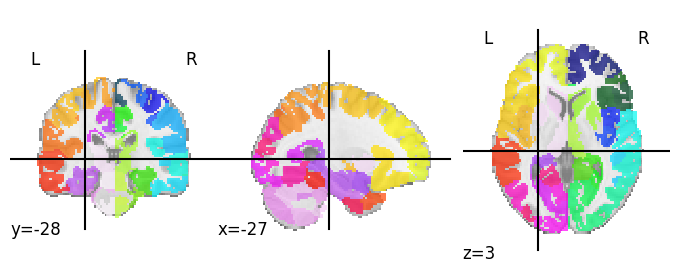

In [10]:
from nilearn import plotting
plotting.plot_roi(Shen_ROI)

<font color = "#00dddd" font size = 5>3.2 读取图谱的标签和坐标信息</font>

<font color = "#00dddd" font size = 5>5 计算并写入相关矩阵</font>

In [11]:
for i in subjName :
    try:
        ##funwd是每个被试所在fMRI数据所在的位置
        funpwd = i+"/func/"+ i+ "_task_restingstate_acq_mb3_space_MNI152NLin2009cAsym_desc_preproc_bold.nii.gz"
    ##读取被试的fmri文件
        sub = nib.load(funpwd)
    
    
    
    
    ###读取混淆变量
        confoundspwd = i+"/func/"+ i+ "_task_restingstate_acq_mb3_desc_confounds_regressors.tsv"
        confounds1 = pd.read_table(confoundspwd,sep='\t')
        confounds2 = confounds1.values
        confounds3 = np.nan_to_num(confounds2)
    
    
    
    
    
    
    
    ##获得时间序列
        time_series = mask.fit_transform(sub,confounds=confounds3)
    ##计算相关矩阵
        correlation_measure = ConnectivityMeasure(kind='correlation')
        correlation_matrix = correlation_measure.fit_transform([time_series])[0]
        name=str(i)
        globals()[name] = correlation_matrix
    ##写入同名的csv文件
        csvname = "G:/Graduation Project/OneDrive - hunnu/AMOIC/RAW/Matrix/shen268_corr/" + i + ".csv"
        np.savetxt(csvname, correlation_matrix, delimiter=',',fmt='%f')
    except Exception as e:
        with open("G:/Graduation Project/OneDrive - hunnu/AMOIC/RAW/Matrix/corr.txt","a") as f:
            f.write("Error: " + str(e) + "\n")
            continue
    
    
    
    
    
    
    

<font color = "#00dddd" font size = 5>6 计算概率图谱的写入相关矩阵</font>

In [23]:
masker = NiftiMapsMasker(
    maps_img=atlas_filename,
    standardize=True,
    memory="nilearn_cache",
    verbose=5,
)

In [ ]:
for i in subjName :
    try:
        ##funwd是每个被试所在fMRI数据所在的位置
        funpwd = i+"/func/"+ i+ "_task_rest_bold_space_MNI152NLin2009cAsym_preproc.nii.gz"
    ##读取被试的fmri文件
        sub = nib.load(funpwd)
    
    
    
    
    ###读取混淆变量
        confoundspwd = i+"/func/"+ i+ "_task_rest_bold_confounds.tsv"
        confounds1 = pd.read_table(confoundspwd,sep='\t')
        confounds2 = confounds1.values
        confounds3 = np.nan_to_num(confounds2)
    
    
    
    
    
    
    
    ##获得时间序列
        masker.fit(sub)
        time_series = masker.transform(sub,confounds = confounds3)
    ##计算相关矩阵
        correlation_measure = ConnectivityMeasure(kind="partial correlation")
        correlation_matrix = correlation_measure.fit_transform([time_series])[0]
        name=str(i)
        globals()[name] = correlation_matrix
    ##写入同名的csv文件
        csvname = "G:/Matrix/UCLA/Matrix_MSDL_partial correlation/Rest/" + i + ".csv"
        np.savetxt(csvname, correlation_matrix, delimiter=',',fmt='%f')
    except Exception as e:
        with open("G:/Matrix/UCLA/Matrix_MSDL_partial correlation/Error.txt","a") as f:
            f.write("Error: " + str(e) + "\n")
            continue

In [39]:
reset

In [26]:
reset

In [32]:
import os
import shutil

source_dir = 'G:/Matrix/UCLA/Matrix_MSDL_tangent/Rest/'
target_dir = 'G:/Matrix/UCLA/ZZZ/msdl_tangent/'

for file in os.listdir(source_dir):
    if file.startswith('sub_1'):
        shutil.copy(os.path.join(source_dir, file), os.path.join(target_dir, 'HC_1.'))
    elif file.startswith('sub_5'):
        shutil.copy(os.path.join(source_dir, file), os.path.join(target_dir, 'SZ_5'))
    elif file.startswith('sub_6'):
        shutil.copy(os.path.join(source_dir, file), os.path.join(target_dir, 'BD_6'))
    elif file.startswith('sub_7'):
        shutil.copy(os.path.join(source_dir, file), os.path.join(target_dir, 'ADHD_7'))